In [1]:
import pycaret
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [2]:

# Read the CSV file into a DataFrame
hotel_data = pd.read_csv('hotel_booking_cleaned_no_country.csv')
hotel_data

,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...
9694,Direct,0,2,No Deposit,0,Transient-Party,A,1,1,0
9695,Online TA,0,0,No Deposit,0,Transient-Party,C,0,2,0
9696,Groups,0,0,No Deposit,0,Transient-Party,A,0,1,0
9697,Online TA,0,0,No Deposit,0,Transient,B,0,0,0


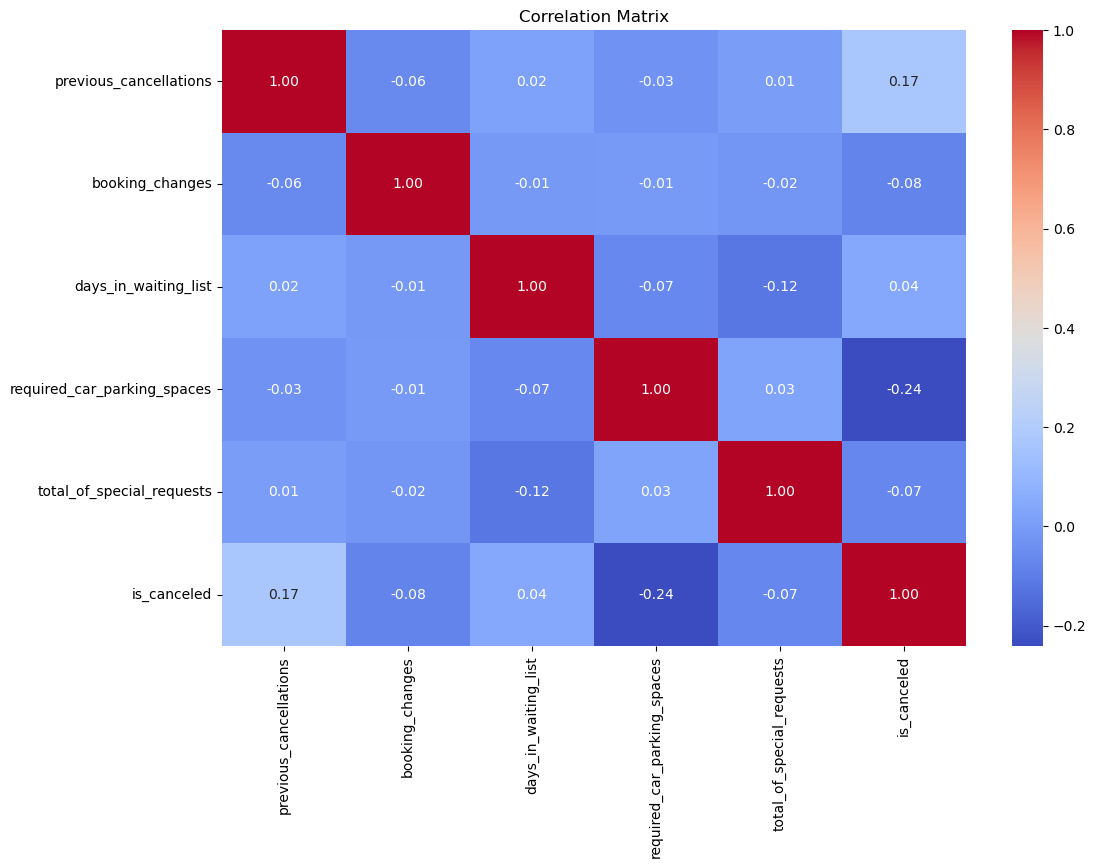

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


# Correlation Matrix
correlation_matrix = hotel_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")

# Show the plots
plt.show()


## one hot encoder

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Creating a copy of the dataset for transformations
transformed_data = hotel_data.copy()

# Label Encoding for 'country'
le_country = LabelEncoder()

# One-Hot Encoding for the remaining categorical columns
categorical_columns = ['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']
transformed_data = pd.get_dummies(transformed_data, columns=categorical_columns, drop_first=True)

# Display the transformed data
transformed_data.head()


,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,...,customer_type_Transient-Party,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


the data has been changed into binary.

## Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to be scaled
numerical_columns = ['previous_cancellations', 'booking_changes', 
                     'days_in_waiting_list', 'required_car_parking_spaces', 
                     'total_of_special_requests']

# Applying Standard Scaler
scaler = StandardScaler()
hotel_data[numerical_columns] = scaler.fit_transform(transformed_data[numerical_columns])

# Display the scaled data
transformed_data.head()


,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,...,customer_type_Transient-Party,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__insight__

scalling has been successfully aplied. 

## check distribusi cancelled vs non cancelled

In [6]:
# Check the distribution of the 'is_canceled' target variable
target_distribution = hotel_data['is_canceled'].value_counts(normalize=True)
target_distribution


0    0.763068
1    0.236932
Name: is_canceled, dtype: float64

__insight__

the distribution is bit skewed to the right lets try some methods to fix it.

## IMBALANCE method

In [7]:
from imblearn.over_sampling import SMOTE

# Define the features and the target
X = transformed_data.drop('is_canceled', axis=1)
y = transformed_data['is_canceled']

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking the new distribution of the target variable
new_target_distribution = pd.Series(y_resampled).value_counts(normalize=True)
new_target_distribution


0    0.5
1    0.5
Name: is_canceled, dtype: float64

## resample

In [8]:
from sklearn.utils import resample

# Separate the dataset into the majority and minority classes
majority_class = transformed_data[transformed_data['is_canceled'] == 0]
minority_class = transformed_data[transformed_data['is_canceled'] == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match number in majority class
                              random_state=42)  # Reproducible results

# Combine the majority class with the upsampled minority class
upsampled_data = pd.concat([majority_class, minority_upsampled])

# Check the new distribution of the target variable
upsampled_target_distribution = upsampled_data['is_canceled'].value_counts(normalize=True)
upsampled_target_distribution


0    0.5
1    0.5
Name: is_canceled, dtype: float64

__insight__

both method has make the amount of sampling more balanced

## logistic regression dan visualisasi

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Defining features and target for the upsampled data
X_upsampled = upsampled_data.drop('is_canceled', axis=1)
y_upsampled = upsampled_data['is_canceled']

# Splitting the upsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, classification_rep, conf_matrix


(0.7338437288898897,
 '              precision    recall  f1-score   support\n\n           0       0.76      0.68      0.72      2225\n           1       0.71      0.78      0.75      2216\n\n    accuracy                           0.73      4441\n   macro avg       0.74      0.73      0.73      4441\nweighted avg       0.74      0.73      0.73      4441\n',
 array([[1522,  703],
        [ 479, 1737]], dtype=int64))

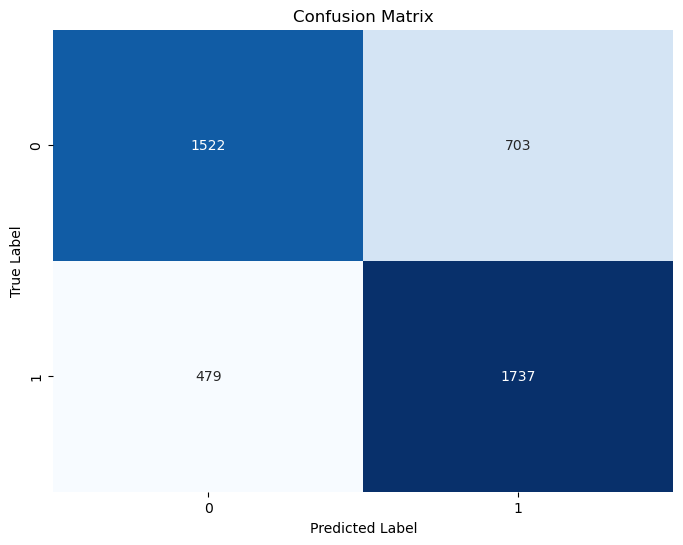

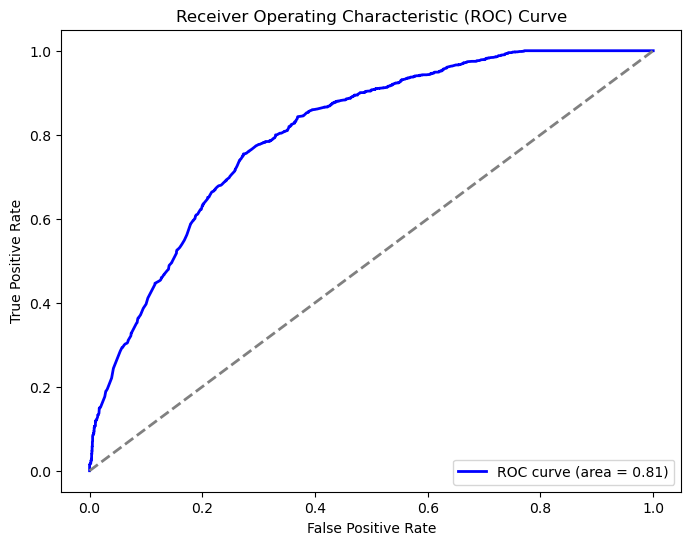

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculating ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


__insight__

 the accuration of the model is 73 percent, recall is quite efficient and precision and also F1 score is quite good on differentiate classess

##  decision trees  dan visualisasikan

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluating the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

accuracy_dt, classification_rep_dt, conf_matrix_dt


(0.7592884485476245,
 '              precision    recall  f1-score   support\n\n           0       0.82      0.67      0.73      2225\n           1       0.72      0.85      0.78      2216\n\n    accuracy                           0.76      4441\n   macro avg       0.77      0.76      0.76      4441\nweighted avg       0.77      0.76      0.76      4441\n',
 array([[1481,  744],
        [ 325, 1891]], dtype=int64))

__insight__

 decision tree have higher accuracy than logistic regression. recall for cancellation is high while  F1 score shows good performance on differentiate the classess.

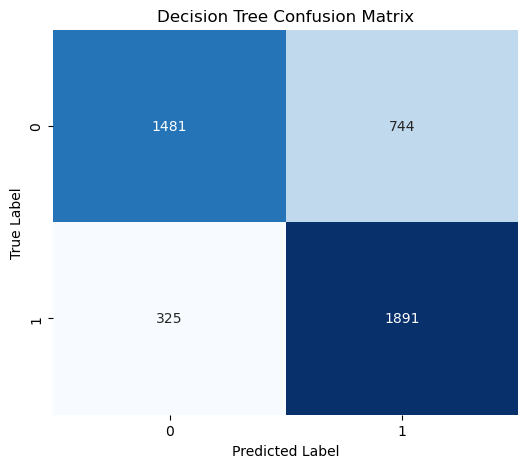

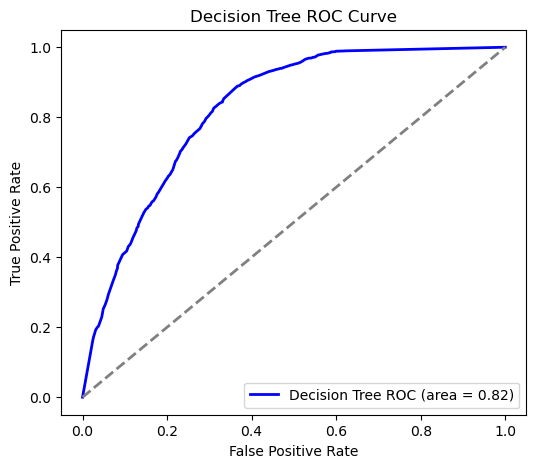

In [12]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plotting Confusion Matrix for Decision Tree
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



# Plotting ROC Curve for Decision Tree
plt.figure(figsize=(6, 5))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree ROC (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()



## GBM dan visualisasi

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=42)

from sklearn.model_selection import train_test_split

# Asumsikan X adalah fitur dan y adalah target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
gbm.fit(X_train, y_train)

# Predictions on the test set
y_pred_gbm = gbm.predict(X_test)

# Evaluating the model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
classification_rep_gbm = classification_report(y_test, y_pred_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

accuracy_gbm, classification_rep_gbm, conf_matrix_gbm


(0.7845360824742268,
 '              precision    recall  f1-score   support\n\n           0       0.80      0.95      0.87      1456\n           1       0.66      0.28      0.39       484\n\n    accuracy                           0.78      1940\n   macro avg       0.73      0.62      0.63      1940\nweighted avg       0.76      0.78      0.75      1940\n',
 array([[1386,   70],
        [ 348,  136]], dtype=int64))

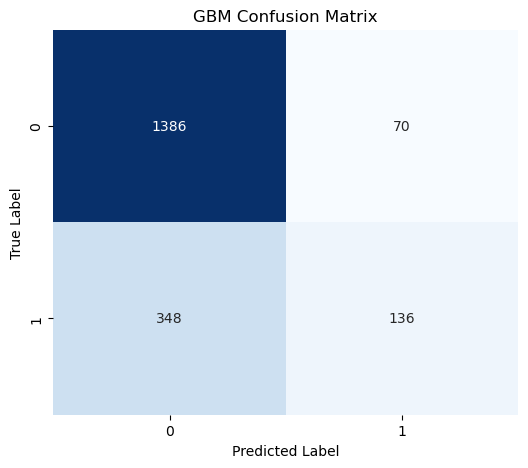

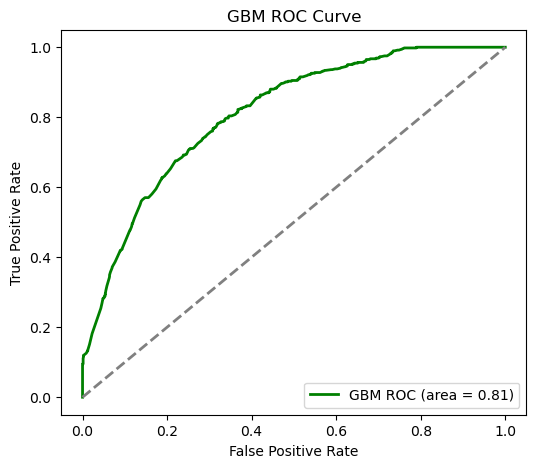

In [14]:
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, gbm.predict_proba(X_test)[:, 1])
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

# Plotting Confusion Matrix for GBM
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('GBM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Plotting ROC Curve for GBM
plt.figure(figsize=(6, 5))
plt.plot(fpr_gbm, tpr_gbm, color='green', lw=2, label='GBM ROC (area = %0.2f)' % roc_auc_gbm)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GBM ROC Curve')
plt.legend(loc='lower right')
plt.show()



__insight__ 

. GBM model showed high level of accuracy(78). recall is quite high for cancelled, showing the eficiency of the model.  the precision and f1-score showed ability of the model to differentiate the classess. 

## svm

In [15]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier
svm = SVC(probability=True, random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm.predict(X_test)

# Evaluating the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print (accuracy_svm),
print(classification_rep_svm),
print(conf_matrix_svm)


0.7701030927835052
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      1456
           1       0.78      0.11      0.19       484

    accuracy                           0.77      1940
   macro avg       0.77      0.55      0.53      1940
weighted avg       0.77      0.77      0.70      1940

[[1441   15]
 [ 431   53]]


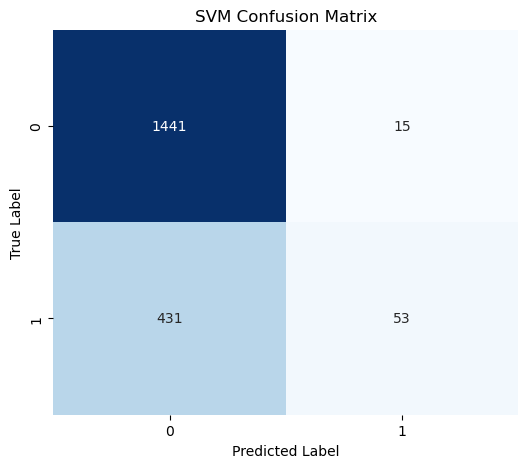

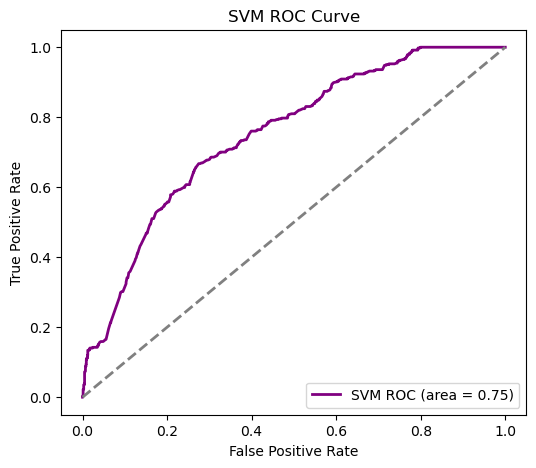

In [16]:
# Calculating ROC Curve and AUC for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotting Confusion Matrix for SVM
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting ROC Curve for SVM
plt.figure(figsize=(6, 5))
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label='SVM ROC (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.show()


__insight__

SVM accuracy is 75 percent which is quite high. there is high imbalance in recall which shows it is not working. F1 score is low which is not ideal.

## KNN 


In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors Classifier with default K
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Predictions on the test set
y_pred_knn = knn.predict(X_test)

# Evaluating the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(accuracy_knn) 
print (classification_rep_knn), 
print (conf_matrix_knn)


0.7345360824742269
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1456
           1       0.46      0.34      0.39       484

    accuracy                           0.73      1940
   macro avg       0.63      0.60      0.61      1940
weighted avg       0.71      0.73      0.72      1940

[[1260  196]
 [ 319  165]]


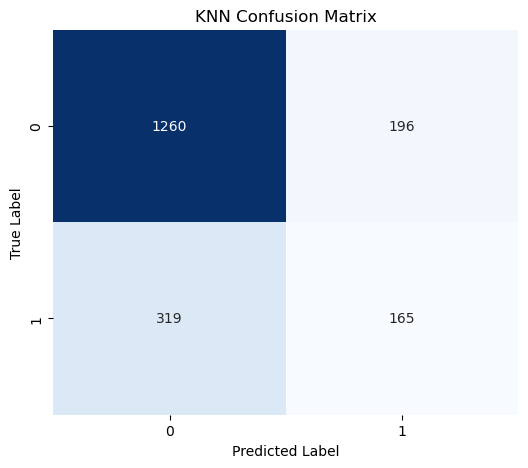

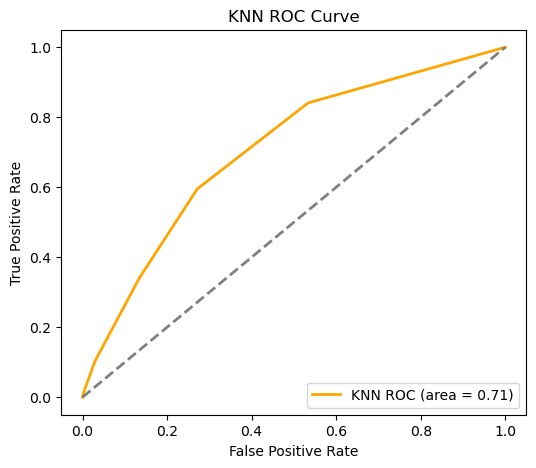

In [18]:
# Calculating ROC Curve and AUC for KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plotting Confusion Matrix for KNN
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting ROC Curve for KNN
plt.figure(figsize=(6, 5))
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label='KNN ROC (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc='lower right')
plt.show()


__insight__ 

KNN model showing good performance with the accuracy about 72 %. there is huge gap betwen class on the recall section. F1- score of both classess are good especially for cancelled

In [19]:
from pycaret.classification import setup, compare_models

# Assuming 'data' is your DataFrame and 'target' is the target variable
# Exclude the 'excluded_column' from the modeling process
setup(hotel_data, ignore_features=['country'])

# Now you can proceed with other PyCaret functions, such as compare_models
best_model = compare_models()





,Description,Value
0,Session id,7888
1,Target,is_canceled
2,Target type,Binary
3,Original data shape,"(9699, 10)"
4,Transformed data shape,"(9699, 31)"
5,Transformed train set shape,"(6789, 31)"
6,Transformed test set shape,"(2910, 31)"
7,Ignore features,1
8,Numeric features,5
9,Categorical features,4


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7947,0.8159,0.2543,0.6833,0.3669,0.2750,0.3241,0.0710
ada,Ada Boost Classifier,0.7914,0.8126,0.2430,0.6668,0.3543,0.2614,0.3095,0.0510
lr,Logistic Regression,0.7882,0.8084,0.2213,0.6589,0.3296,0.2399,0.2909,0.8870
ridge,Ridge Classifier,0.7860,0.0000,0.1380,0.7748,0.2331,0.1743,0.2640,0.0230
lda,Linear Discriminant Analysis,0.7860,0.8036,0.1560,0.7333,0.2562,0.1886,0.2673,0.0240
svm,SVM - Linear Kernel,0.7852,0.0000,0.1349,0.7758,0.2287,0.1704,0.2608,0.0260
lightgbm,Light Gradient Boosting Machine,0.7842,0.8040,0.2829,0.5955,0.3806,0.2705,0.2991,0.1060
nb,Naive Bayes,0.7743,0.7860,0.1324,0.6249,0.2157,0.1448,0.2061,0.0200
et,Extra Trees Classifier,0.7710,0.7518,0.2934,0.5307,0.3767,0.2509,0.2678,0.0830
knn,K Neighbors Classifier,0.7696,0.7421,0.3878,0.5182,0.4432,0.3019,0.3071,0.6640


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

__insight__


GBC is the best model for this one

### Conclusion

SO we will use 3 models which are Neural Network, logistic regression and GBM to be used on hyperparameters tuning

# MODELING HYPERPARAMETER


## logistic regression

In [20]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # These solvers work with l1 penalty
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Find the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 5 folds for each of 24 candidates, totalling 120 fits


({'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}, 0.8093671841865246)

__insight__
C (Regularisasi): 10
Penalty (Jenis Regularisasi): l1
Solver: liblinear

highest AUC Score through Grid Search is 0.815, which shows the increase of quality through this parameter.

__insight__
Activation function: 'tanh'
Alpha (regularization parameter): 0.001
Hidden Layer Sizes: (100,)
The corresponding best score (roc_auc) is approximately 0.8314.

# Gradient Boosting Method

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for GBM
gbm_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Create a GridSearchCV object for GBM
gbm_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                               gbm_param_grid, 
                               cv=5, 
                               scoring='roc_auc', 
                               verbose=1, 
                               n_jobs=-1)

# Perform the grid search on the training data
gbm_grid_search.fit(X_train, y_train)

# Find the best parameters and the best score for GBM
gbm_best_params = gbm_grid_search.best_params_
gbm_best_score = gbm_grid_search.best_score_

gbm_best_params, gbm_best_score


Fitting 5 folds for each of 32 candidates, totalling 160 fits


({'learning_rate': 0.1,
  'max_depth': 3,
  'min_samples_leaf': 1,
  'min_samples_split': 4,
  'n_estimators': 100},
 0.8171848316788394)

it seems the highest rate after hyperparametertuning is  81 %.

In [32]:
# Misalkan numerical_features dan categorical_features adalah list nama kolom
numerical_features = ['feature1', 'feature2']  # Ganti dengan nama fitur numerik Anda
categorical_features = ['feature3', 'feature4']  # Ganti dengan nama fitur kategorikal Anda

# Transformasi untuk variabel numerik
numerical_transformer = StandardScaler()

# Transformasi untuk variabel kategorikal
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessor yang menggabungkan transformasi
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [34]:
# Membuat model GBM
gbm = GradientBoostingClassifier(random_state=42)

# Membuat pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', gbm)])

pipeline


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['feature1', 'feature2']),
                                                 ('cat',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown=

### kesimpulan akhir 

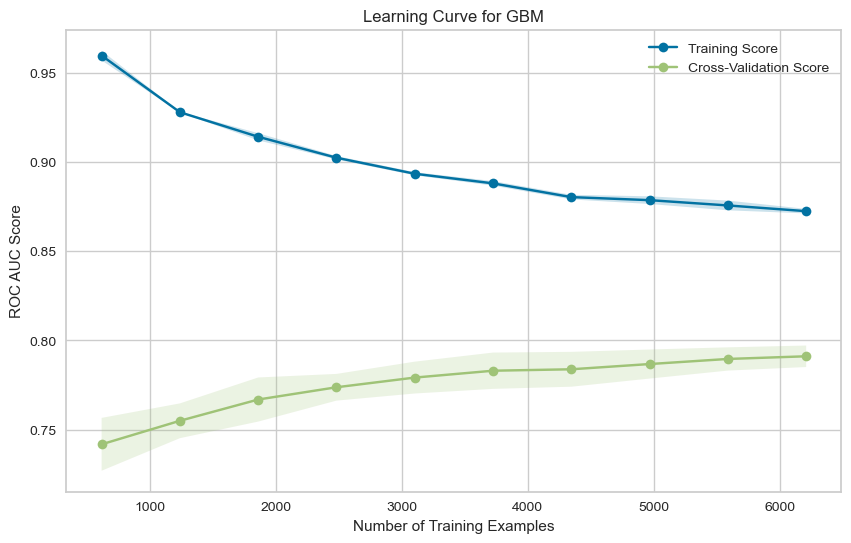

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assume you already have a trained GBM model (gbm_model) and your training data (X_train, y_train)

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.9, random_state=42),
    X_train, y_train, cv=5, scoring='roc_auc', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)

plt.plot(train_sizes, test_mean, marker='o', label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

plt.title('Learning Curve for GBM')
plt.xlabel('Number of Training Examples')
plt.ylabel('ROC AUC Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


__insight__ 

If the training and cross-validation scores are converging and reaching high values, it suggests that your model is learning effectively and is likely to generalize well to new data. However, keep in mind that the exact interpretation can depend on the specific characteristics of your data and the problem you are trying to solve.

In [23]:
# Membuat model GBM dengan parameter terbaik dari grid search
gbm_model = GradientBoostingClassifier(**gbm_best_params, random_state=42)

# Melatih model dengan data pelatihan
gbm_model.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = gbm_model.predict(X_test)

# Evaluasi model
from sklearn.metrics import classification_report, accuracy_score

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.7845360824742268

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      1456
           1       0.66      0.28      0.39       484

    accuracy                           0.78      1940
   macro avg       0.73      0.62      0.63      1940
weighted avg       0.76      0.78      0.75      1940



In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# Membuat model GBM dengan parameter terbaik dari grid search
gbm_model = GradientBoostingClassifier(**gbm_best_params, random_state=42)

# Melatih model dengan data pelatihan
gbm_model.fit(X_train, y_train)

# Melakukan prediksi probabilitas pada data pengujian
y_pred_proba = gbm_model.predict_proba(X_test)[:, 1]

# Menghitung skor ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.8090347152847153


   ##  ROC, PR Curve, Discriminant Threshold (Classification)


NOT YET

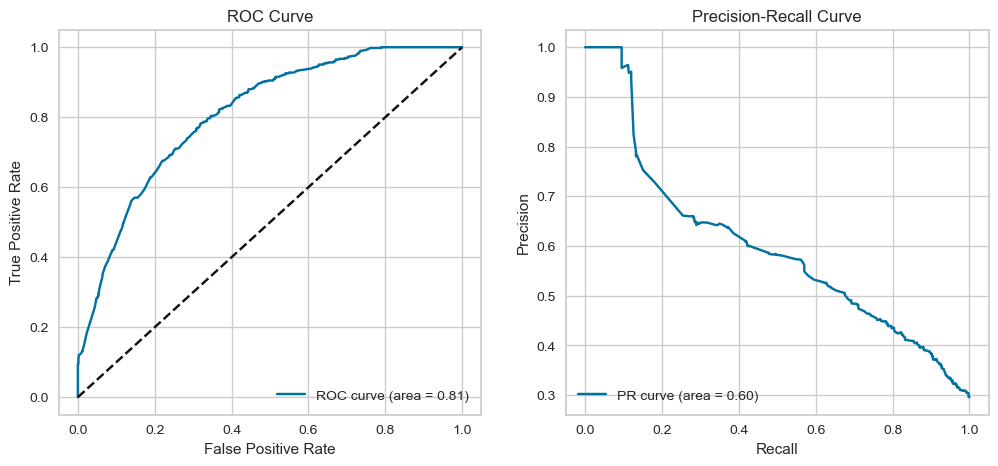

In [25]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Menghitung ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Menghitung Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


__insight__

 ROC_AUC is stagnant

In [26]:

# Perform predictions on the test set as a stand-in for a validation set
y_pred_valid = gbm_model.predict(X_test)
y_pred_proba_valid = gbm_model.predict_proba(X_test)[:, 1]

# Evaluating the model on the validation set
accuracy_valid = accuracy_score(y_test, y_pred_valid)
classification_rep_valid = classification_report(y_test, y_pred_valid)
conf_matrix_valid = confusion_matrix(y_test, y_pred_valid)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_test, y_pred_proba_valid)
roc_auc_valid = auc(fpr_valid, tpr_valid)

print(accuracy_valid) 
print(classification_rep_valid) 
print(conf_matrix_valid)
print(roc_auc_valid)


0.7845360824742268
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1456
           1       0.66      0.28      0.39       484

    accuracy                           0.78      1940
   macro avg       0.73      0.62      0.63      1940
weighted avg       0.76      0.78      0.75      1940

[[1386   70]
 [ 348  136]]
0.8090347152847153


In [27]:
print(accuracy_gbm)
print(gbm_best_score)


0.7845360824742268
0.8171848316788394


__insight__

There is an significant increase for about 5 percent after hyperparametertuning

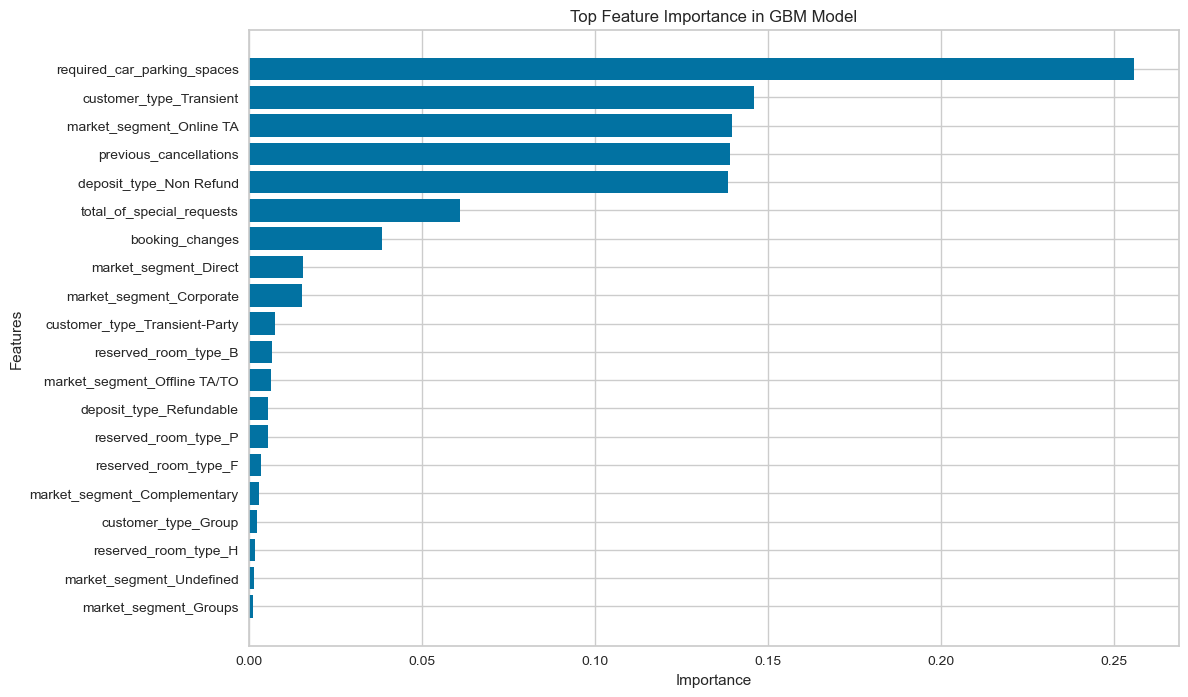

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Misalkan gbm_model adalah model GBM Anda
feature_importances = gbm.feature_importances_
feature_names = X_train.columns  # Sesuaikan dengan nama fitur dataset Anda

# Urutkan feature importance dan cocokkan dengan nama fitur
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_features = feature_names[sorted_idx]

# Jumlah fitur yang akan ditampilkan (misalnya 20 fitur teratas)
n_top_features = 20

# Buat plot batang yang lebih besar
plt.figure(figsize=(12, 8))
plt.barh(sorted_features[:n_top_features], sorted_importances[:n_top_features], align='center')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top Feature Importance in GBM Model')
plt.gca().invert_yaxis()  # Invers urutan fitur
plt.show()


__insight__
required car parking space is highest followed with online TA and customer type transition.

for future consideration, certain reserved features could be ignored since they have effect for less than 1 percent. 


In [30]:
print(classification_rep_valid)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1456
           1       0.66      0.28      0.39       484

    accuracy                           0.78      1940
   macro avg       0.73      0.62      0.63      1940
weighted avg       0.76      0.78      0.75      1940



# conclusion
0= is cancelled
1= is not cancelled

based on the recall we get that it has 94 percent score that is not interested and 32 percent that is interested. this is very interesting because the model seems able to determine the 94 percent of people who will cancel the booking

for the precision, this model has 81 percent for cancelled and 62 percent that is not cancelled. this means the prediction can determine true positives of people for about 81 percent. 

we will make a case example for this model. Based on the information from [external data](https://www.budgetyourtrip.com/hotels/portugal-PT#:~:text=The%20average%20hotel%20price%20in,days%20in%20Portugal%20is%20%24296) the average price is 99 dollars. If we have 200 customers with half of them cancelled the booking, then the profit we will get:

1. Without the model

full profit= 99 * 200 = 18800

cancelled customer= 99* 100 = 9900

net profit= 9900 dollars

2. With the model

full profit 99* 200= 19800

cancelled customer= 99* 6= 594

net profit= 19800 -594= 19206

The model increases our profit significantly by predicting the amount of booking that is not cancelled. 
# Recommendation
1.	Adding unique ID for the customers so we can get more data and decreasing amount of duplicates
2.	Also, adding more column such as occupation and type of car so we can get better understanding of what kind of customer that cancelled and not cancelled the booking
3.	After adding more columns, we can  try modelling all of them back and use other methods such as oversampling or imbalance
4.	Train them with different sets of data in order to increase the probability. 
